In [2]:
import yfinance as yf
from datetime import *
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
symbols = ['TCS.NS']
for symbol in symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    print(f"Symbol: {symbol}")
    print(f"Name: {info.get('shortName', 'N/A')}")
    print(f"Market: {info.get('market', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print("-" * 30)

Symbol: TCS.NS
Name: TATA CONSULTANCY SERV LT
Market: N/A
Sector: Technology
------------------------------


In [4]:
stock='TCS.NS'  

start = '2000-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,,
2002-08-12,27.938730,0.0,28.149854,27.252576,27.252576,0.0,212976
2002-08-13,27.560478,0.0,28.422570,27.358152,27.973930,0.0,153576
2002-08-14,25.660357,0.0,27.622049,25.141341,27.622049,0.0,822776
2002-08-15,25.660357,0.0,25.660357,25.660357,25.660357,0.0,0
2002-08-16,25.598772,0.0,26.742360,25.158931,25.528398,0.0,811856
...,...,...,...,...,...,...,...
2025-01-23,4145.450195,0.0,4191.350098,4140.049805,4168.000000,0.0,1822998
2025-01-24,4152.350098,0.0,4178.000000,4104.000000,4104.000000,0.0,1910099


Price             Close
Ticker           TCS.NS
Date                   
2002-08-12    27.938730
2002-08-13    27.560478
2002-08-14    25.660357
2002-08-15    25.660357
2002-08-16    25.598772
...                 ...
2025-01-23  4145.450195
2025-01-24  4152.350098
2025-01-27  4065.149902
2025-01-28  4040.300049
2025-01-29  4099.799805

[5578 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


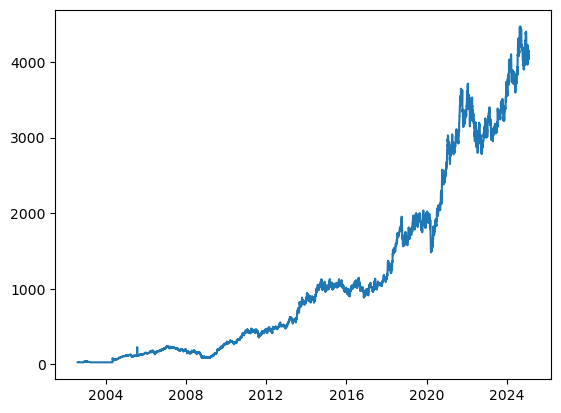

In [5]:
df = df.loc[:, ['Close']]
plt.plot(df['Close'])
print(df)
print(type(df))

In [6]:
print("Original Columns:", df.columns)

Original Columns: MultiIndex([('Close', 'TCS.NS')],
           names=['Price', 'Ticker'])


In [7]:
for col in df.columns:
    print(col)
    print('_'.join(col).strip())

('Close', 'TCS.NS')
Close_TCS.NS


In [8]:
# Flatten the MultiIndex
df.columns = ['_'.join(col).strip() for col in df.columns]

# Display the resulting columns
print("Flattened Columns:", df.columns)


Flattened Columns: Index(['Close_TCS.NS'], dtype='object')


In [9]:
# Rename columns to 'ds' and 'y'
df['ds'] = df.index  # Assign the index as the 'ds' column
df = df.rename(columns={'Close_TCS.NS': 'y'})

# Check the updated DataFrame
print(df.head())

                    y         ds
Date                            
2002-08-12  27.938730 2002-08-12
2002-08-13  27.560478 2002-08-13
2002-08-14  25.660357 2002-08-14
2002-08-15  25.660357 2002-08-15
2002-08-16  25.598772 2002-08-16


In [10]:
print(df)

                      y         ds
Date                              
2002-08-12    27.938730 2002-08-12
2002-08-13    27.560478 2002-08-13
2002-08-14    25.660357 2002-08-14
2002-08-15    25.660357 2002-08-15
2002-08-16    25.598772 2002-08-16
...                 ...        ...
2025-01-23  4145.450195 2025-01-23
2025-01-24  4152.350098 2025-01-24
2025-01-27  4065.149902 2025-01-27
2025-01-28  4040.300049 2025-01-28
2025-01-29  4099.799805 2025-01-29

[5578 rows x 2 columns]


In [ ]:
from prophet import Prophet
import pandas as pd

# Sample Data: Replace this with your dataset
data = pd.DataFrame(df)

data['ds'] = pd.to_datetime(data['ds'])

# Initialize the Prophet model
model = Prophet(
    changepoint_prior_scale=0.001,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

# Fit the model with the historical data
model.fit(data)

# Create a future DataFrame for the next 5 days
future = model.make_future_dataframe(periods=5)

# Generate predictions
forecast = model.predict(future)

# Display the relevant columns from the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


14:33:10 - cmdstanpy - INFO - Chain [1] start processing
14:33:10 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
import sqlite3
conn = sqlite3.connect('forecast_database.db')
forecast.to_sql('TCS_Stock_Prediction', con=conn, index=False, if_exists='replace')
conn.close()

In [ ]:
# Display the forecast
print(forecast[['ds','yhat', 'yhat_lower','yhat_upper']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler()
df['y_scaled'] = scaler.fit_transform(df[['y']])

# Save scaler and model
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('TCS_Stock_Model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
print(forecast.to_csv('TCS_Stock_Model.csv'))

In [ ]:
!pip install --upgrade pip setuptools


In [ ]:
!pip install numpy==1.21.0

In [ ]:
import pickle
import numpy as np

# Load the model
with open('TCS_Stock_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Test input
test_input = np.array([[20000]], dtype=np.float32)
prediction = model.predict(test_input)
print(f"Prediction: {prediction}")
